<ipython-input-20-36e5abcbb6c2>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Election Date'] = pd.to_datetime(data['Election Date'])
<ipython-input-20-36e5abcbb6c2>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       427
           1       0.98      0.99      0.99       851

    accuracy                           0.98      1278
   macro avg       0.98      0.98      0.98      1278
weighted avg       0.98      0.98      0.98      1278

Accuracy Score: 0.9812206572769953


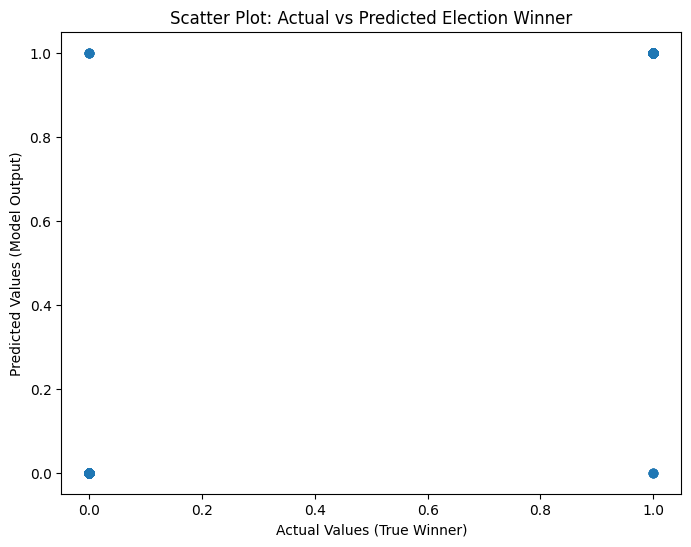

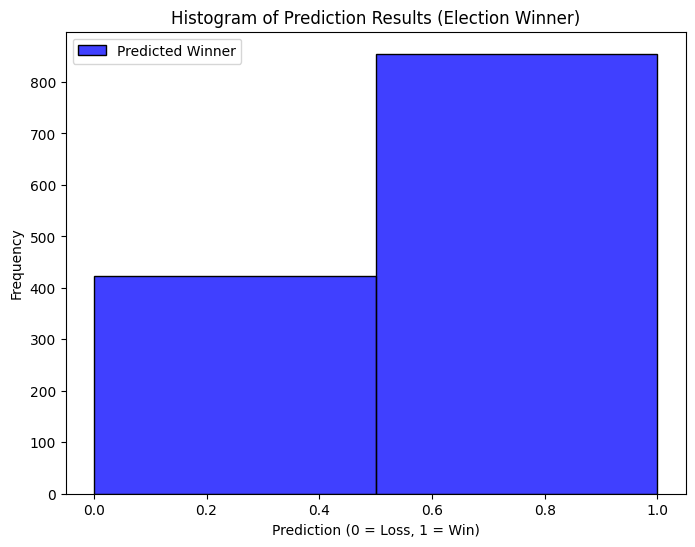

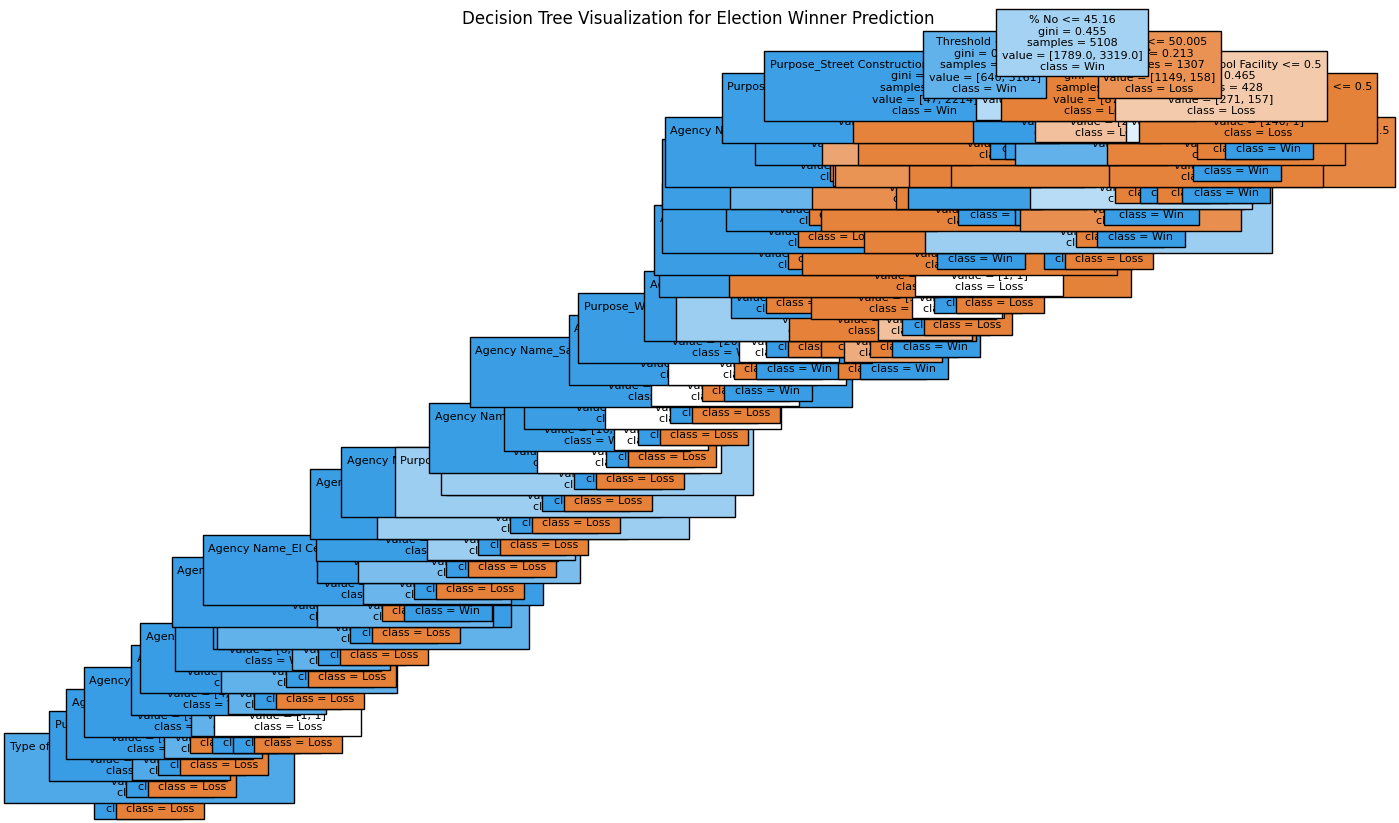

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace with your file path)
data = pd.read_csv('Election_Data.csv')  # Replace with your actual file path

# Data preprocessing
data['Election Date'] = pd.to_datetime(data['Election Date'])
data['Threshold'] = data['Threshold'].apply(lambda x: 1 if x == 'two-thirds' else 0)

# Define the target variable for prediction


# 1. For district election winner, use 'District Winner' (0: No, 1: Yes).
# 2. For presidential election winner, use 'Presidential Winner' (0: No, 1: Yes).
# Make sure the target variable exists in your dataset, or create it based on prior election data.
data['District Winner'] = data['Result (Pass/Fail)'].apply(lambda x: 1 if x == 'Pass' else 0)  # Placeholder; replace with actual column

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Convert categorical columns to numeric using one-hot encoding
categorical_cols = ['Agency County', 'Agency Name', 'Type of Tax/Debt', 'Purpose', 'Election Type']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Feature Selection: Exclude the columns that aren't useful for the prediction task
X = data.drop(columns=['Result (Pass/Fail)', 'Election Date', 'Measure', 'Amount of Bond/Tax', 'District Winner'])  # Remove target column
y = data['District Winner']  # Use the 'District Winner' as the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Scatter Plot: Actual vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Scatter Plot: Actual vs Predicted Election Winner")
plt.xlabel("Actual Values (True Winner)")
plt.ylabel("Predicted Values (Model Output)")
plt.show()

# Histogram: Distribution of Prediction Results (Election Winner)
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, kde=False, bins=2, color='blue', label='Predicted Winner')
plt.title("Histogram of Prediction Results (Election Winner)")
plt.xlabel("Prediction (0 = Loss, 1 = Win)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Visualization: Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['Loss', 'Win'], filled=True, fontsize=8)
plt.title("Decision Tree Visualization for Election Winner Prediction")
plt.show()
